In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('song_hotness.csv')

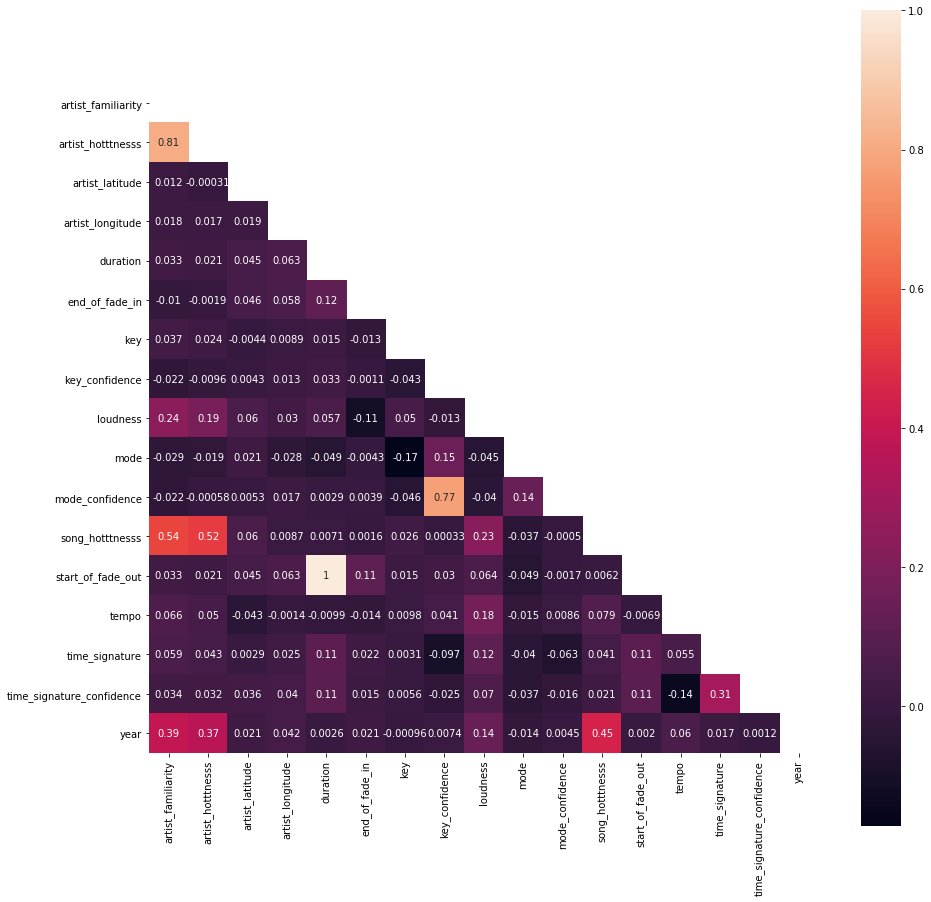

In [11]:
corr = df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True 
sns.heatmap(corr, mask=mask, cbar=True, annot=True, square=True, annot_kws={'size': 10})

In [9]:
df2 = df[['artist_familiarity', 'artist_hotttnesss','artist_name','duration', 'end_of_fade_in', 'key', 'key_confidence', 'loudness',
       'mode', 'mode_confidence', 'release', 'song_hotttnesss', 'tempo', 'time_signature',
       'time_signature_confidence', 'title', 'year']]

In [ ]:
!pip install fancyimpute

In [20]:
from fancyimpute import IterativeImputer

In [42]:
df3 = df2.select_dtypes(include=['float64','int64']).copy()
df3['song_hotttnesss']=df3['song_hotttnesss'].replace(0,np.nan)
df3.head()

,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,year
0,0.780462,0.574275,280.21506,0.238,5,0.555,-3.306,1,0.500,0.597641,173.205,5,0.120,2001
1,0.581794,0.401998,218.93179,0.247,1,0.736,-11.197,0,0.636,0.602120,92.198,4,0.778,0
2,0.630630,0.417500,148.03546,0.148,6,0.169,-9.843,0,0.430,NaN,121.274,4,0.384,1969
3,0.487357,0.343428,177.47546,0.282,8,0.643,-9.689,1,0.565,NaN,100.070,1,0.000,0
4,0.630382,0.454231,233.40363,0.000,0,0.751,-9.013,1,0.749,NaN,119.293,4,0.000,1982


In [46]:
df4 = IterativeImputer().fit_transform(df3)

In [102]:
data = pd.DataFrame(df4,columns=df3.columns)

In [49]:
data.to_csv('data.csv', index = None, header=True)

In [51]:
data.head()

,artist_familiarity,artist_hotttnesss,duration,end_of_fade_in,key,key_confidence,loudness,mode,mode_confidence,song_hotttnesss,tempo,time_signature,time_signature_confidence,year
0,0.780462,0.574275,280.21506,0.238,5.0,0.555,-3.306,1.0,0.500,0.597641,173.205,5.0,0.120,2001.0
1,0.581794,0.401998,218.93179,0.247,1.0,0.736,-11.197,0.0,0.636,0.602120,92.198,4.0,0.778,0.0
2,0.630630,0.417500,148.03546,0.148,6.0,0.169,-9.843,0.0,0.430,0.487941,121.274,4.0,0.384,1969.0
3,0.487357,0.343428,177.47546,0.282,8.0,0.643,-9.689,1.0,0.565,0.333576,100.070,1.0,0.000,0.0
4,0.630382,0.454231,233.40363,0.000,0.0,0.751,-9.013,1.0,0.749,0.500797,119.293,4.0,0.000,1982.0


In [228]:
df1 = df[['duration', 'end_of_fade_in',
       'key', 'loudness', 'mode','tempo', 'time_signature']]
df2 = df[['song_hotttnesss']]
df2.head()

,song_hotttnesss
0,0.597641
1,0.602120
2,0.487941
3,0.333576
4,0.500797


In [229]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

scaled_df = scaler.fit_transform(df1)
scaled_df = pd.DataFrame(scaled_df, columns=df1.columns)
scaled_df['hot_song'] = df2
scaled_df.head()

,duration,end_of_fade_in,key,loudness,mode,tempo,time_signature,hot_song
0,0.365412,-0.278709,-0.077685,1.329503,0.668509,1.429167,1.133362,0.597641
1,-0.171563,-0.273890,-1.203262,-0.131868,-1.495867,-0.873182,0.343594,0.602120
2,-0.792769,-0.326894,0.203709,0.118886,-1.495867,-0.046796,0.343594,0.487941
3,-0.534810,-0.255151,0.766498,0.147406,0.668509,-0.649448,-2.025712,0.333576
4,-0.044758,-0.406133,-1.484657,0.272597,0.668509,-0.103099,0.343594,0.500797


In [237]:
X = scaled_df.iloc[:, scaled_df.columns != 'hot_song']
y = scaled_df['hot_song']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [239]:
print(model_linreg.intercept_)
print(model_linreg.coef_)

0.4106244871939351
[ 0.00138093  0.00176444 -0.00041195  0.03822243 -0.00327168  0.00840672
  0.00375394]


In [240]:
y_pred = model_linreg.predict(X_test)

In [241]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.1124893941347862
Mean Squared Error: 0.020351004002120462
Root Mean Squared Error: 0.14265694515907895


In [242]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model_randomforest = RandomForestRegressor()
model_randomforest.fit(X_train, y_train)
y_pred = model_randomforest.predict(X_test)
model_randomforest.score(X_test, y_test)

/Users/raei/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.04514288027316682

In [243]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Absolute Error: 0.11940356394557168
Mean Squared Error: 0.02319513207326821
Root Mean Squared Error: 0.15229948152659026


In [244]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=model_randomforest, X=X_train, y=y_train, cv=5)
print(all_accuracies)
print(all_accuracies.mean())

[-0.05686714  0.00376486 -0.00754178 -0.04032977 -0.03181222]
-0.026557208972378787


In [259]:
#XGBoost
import xgboost as xg
xgb_model = xg.XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred2 = xgb_model.predict(X_test)

[16:35:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [260]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))  

Mean Absolute Error: 0.11114676346286972
Mean Squared Error: 0.020001025217114093
Root Mean Squared Error: 0.14142498088072733


In [245]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor

In [246]:
xgb = XGBRegressor(learning_rate=0.02, n_estimators=600, objective='reg:linear')

In [247]:
grid_param = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [270]:
param_comb = 5

random_search = RandomizedSearchCV(xgb, param_distributions=grid_param, n_iter=param_comb, scoring='r2', n_jobs=-1,
                                   cv=5, verbose=3, random_state=42)

In [271]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.7s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   11.6s finished
/Users/raei/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='r2', verbose=3)

In [272]:
random_search.best_params_

{'subsample': 0.6,
 'min_child_weight': 10,
 'max_depth': 3,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [273]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=1,
       importance_type='gain', learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.6, verbosity=1)

In [274]:
random_search.best_score_

0.07890185186945599

In [275]:
random_search.predict(X_test)

array([0.43847683, 0.4648104 , 0.3983755 , ..., 0.42585453, 0.4053114 ,
       0.44135407], dtype=float32)

In [276]:
xgb_model.feature_importances_

array([0.23599215, 0.        , 0.        , 0.38525772, 0.        ,
       0.1880342 , 0.19071598], dtype=float32)

In [277]:
model_randomforest.feature_importances_

array([0.20752542, 0.13339867, 0.08669644, 0.30368606, 0.02052875,
       0.20951835, 0.0386463 ])

In [ ]:
Loudness, Tempo, Duration, End of Fade In

In [278]:
xgb_model = xg.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.6, gamma=1,
       importance_type='gain', learning_rate=0.02, max_delta_step=0,
       max_depth=3, min_child_weight=10, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=0.6, verbosity=1)
xgb_model.fit(X_train,y_train)
y_pred_best = xgb_model.predict(X_test)

[16:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [279]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_best))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_best))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_best)))  

Mean Absolute Error: 0.11227608672144723
Mean Squared Error: 0.020265392625189654
Root Mean Squared Error: 0.142356568605701


Cross-Validation with Random Forest

In [318]:
rf.get_params().keys()

dict_keys(['bootstrap', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [325]:
rf = RandomForestRegressor()
param_comb = 5
parameter_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5],
        'bootstrap': [True, False],
        }
rf_random = RandomizedSearchCV(rf, param_distributions=parameter_grid, n_iter=param_comb, scoring='r2', n_jobs=-1,
                                   cv=5, verbose=3, random_state=42)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    7.0s remaining:    2.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    8.3s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='r2', verbose=3)

In [327]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [329]:
rf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf.fit(X_train, y_train)
y_pred_best2 = rf.predict(X_test)

In [330]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_best2))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_best2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_best2))) 

Mean Absolute Error: 0.11076118456117873
Mean Squared Error: 0.019904813725264685
Root Mean Squared Error: 0.14108442056182066


Linear Regression with cross-validation

In [331]:
lr = LinearRegression()
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [364]:
param_comb = 5
parameter_grid = {
        'copy_X': [True, False],
        'fit_intercept': [True, False],
        'normalize': [True, False]
        }
lr_random = RandomizedSearchCV(lr, param_distributions=parameter_grid, n_jobs=-1,
                              n_iter=param_comb, scoring='r2',
                            cv=5, verbose=3, random_state=42)
lr_random.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  25 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True),
          fit_params=None, iid='warn', n_iter=5, n_jobs=-1,
          param_distributions={'copy_X': [True, False], 'fit_intercept': [True, False], 'normalize': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring='r2', verbose=3)

In [365]:
lr_random.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)

In [366]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=2, normalize=True)
lr.fit(X_train, y_train)
y_pred_best3 = lr.predict(X_test)

In [367]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_best3))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_best3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_best3))) 

Mean Absolute Error: 2.779070874743003
Mean Squared Error: 12.937408972332012
Root Mean Squared Error: 3.596860988741713


In [369]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)

In [370]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Mean Absolute Error: 2.7790708747430037
Mean Squared Error: 12.937408972332017
Root Mean Squared Error: 3.5968609887417133
